In [240]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [241]:
GPP = pd.read_csv(r'C:\Users\ENVY\OneDrive\Documents\database_IND.csv')
GPP.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [242]:
GPP.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [243]:
GPP.shape

(907, 27)

In [244]:
GPP.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [245]:
GPP.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [246]:
GPP.nunique

<bound method DataFrame.nunique of     country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude Fuel_Type other_fuel1 other_fuel2  ...  \
0            2.5   28.1839    73.2407     So

In [247]:
GPP["country"].value_counts()

IND    907
Name: country, dtype: int64

In [248]:
# Checking the count of the country_long
GPP["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [249]:
GPP.drop(columns=["country","country_long"],axis=1,inplace=True)

In [250]:
GPP.drop(columns=["other_fuel2", "year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"], axis=1, inplace=True)

In [251]:
GPP["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [252]:
GPP["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [253]:
#Dropping the columns that has no impact on the prediction
GPP.drop("name",axis=1,inplace=True) 
GPP.drop("gppd_idnr",axis=1,inplace=True)
GPP.drop("owner",axis=1,inplace=True)
GPP.drop("url",axis=1,inplace=True)

In [254]:
# Checking null values again after feature selection
GPP.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

<Axes: >

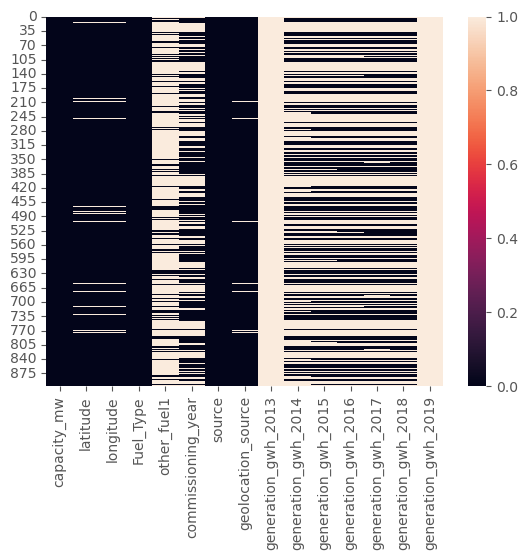

In [255]:
sns.heatmap(GPP.isnull())

In [256]:
GPP.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
generation_gwh_2013         NaN
generation_gwh_2019         NaN
dtype: float64

Treating null values using imputation techniques.

In [257]:
GPP['latitude'].mean()

21.1979181184669

In [258]:
#checking the mode of other_fuel1 
GPP["other_fuel1"].mode()

0    Oil
Name: other_fuel1, dtype: object

In [259]:
#checking the mode of geolocation_source columns
GPP["geolocation_source"].mode()

0    WRI
Name: geolocation_source, dtype: object

In [260]:
# Filling the null values
GPP["latitude"] = GPP["latitude"].fillna(GPP["latitude"].mean())
GPP["other_fuel1"] = GPP["other_fuel1"].fillna(GPP["other_fuel1"].mode()[0])
GPP["geolocation_source"] = GPP["geolocation_source"].fillna(GPP["geolocation_source"].mode()[0])
GPP["longitude"] = GPP["longitude"].fillna(GPP["longitude"].median())
GPP["commissioning_year"] = GPP["commissioning_year"].fillna(GPP["commissioning_year"].median())
GPP["generation_gwh_2013"] = GPP["generation_gwh_2013"].fillna(GPP["generation_gwh_2013"].median())
GPP["generation_gwh_2014"] = GPP["generation_gwh_2014"].fillna(GPP["generation_gwh_2014"].median())
GPP["generation_gwh_2015"] = GPP["generation_gwh_2015"].fillna(GPP["generation_gwh_2015"].median())
GPP["generation_gwh_2016"] = GPP["generation_gwh_2016"].fillna(GPP["generation_gwh_2016"].median())
GPP["generation_gwh_2017"] = GPP["generation_gwh_2017"].fillna(GPP["generation_gwh_2017"].median())

In [261]:
GPP.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
Fuel_Type                0
other_fuel1              0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

<Axes: >

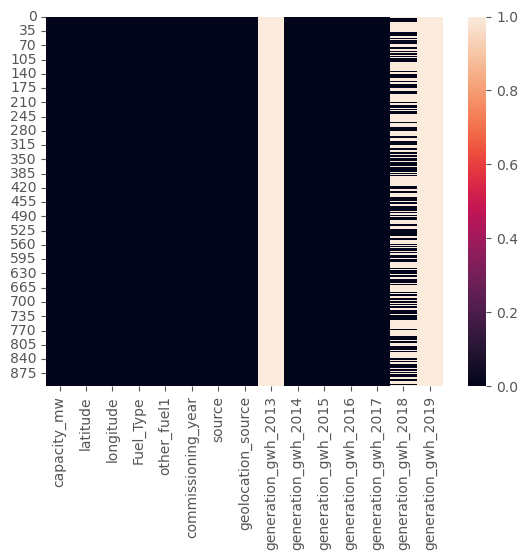

In [262]:
# Let's visualize the null values clearly
sns.heatmap(GPP.isnull())

In [263]:
#Getting the columns in the dataset
GPP.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [264]:
# Checking the list of counts of capacity_mw
GPP['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [265]:
# Checking the list of counts of primary_fuel
GPP['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

In [266]:
# Checking the uniqueness of primary_fuel
GPP["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

Feature Extraction

In [267]:
# Checking the list of counts of commissioning_year
GPP['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [268]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
GPP["Power_plant_age"] = 2018 - GPP["commissioning_year"]
GPP.drop(columns=["commissioning_year"], inplace = True)

In [269]:
GPP.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,3.0


# Statistical Description of the DataSet

In [270]:
GPP.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
count,907.000000,907.000000,907.000000,0.0,907.000000,907.000000,907.000000,907.000000,448.000000,0.0,907.000000
mean,326.223755,21.197918,77.427103,NaN,1516.689956,1510.071296,1565.361383,1657.121797,2600.804099,NaN,19.271224
std,590.085456,6.079148,4.815073,NaN,2785.604307,2984.994556,3005.087210,3046.862910,4314.880456,NaN,13.158621
min,0.000000,8.168900,68.644700,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,16.725000,17.072000,74.388900,NaN,801.123775,711.181225,737.205450,817.977250,193.378250,NaN,15.000000
50%,59.200000,21.281800,76.719500,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,17.000000
75%,385.250000,25.176450,79.206100,NaN,801.123775,711.181225,737.205450,817.977250,3143.535900,NaN,20.000000
max,4760.000000,34.649000,95.408000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,91.000000


In [271]:
#checking the categorical columns
cat_col=[]
for i in GPP.dtypes.index:
    if GPP.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


In [272]:
#checking the numeric columns for visualization
num_col=[]
for i in GPP.dtypes.index:
    if GPP.dtypes[i]!='object':
        num_col.append(i)
print(num_col) 

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'Power_plant_age']


# Data Visualization

In [273]:
print(GPP['Fuel_Type'].value_counts()) 

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


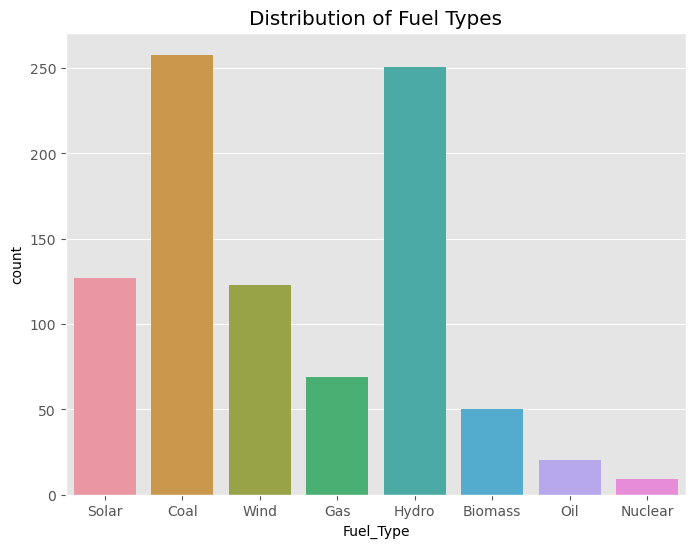

In [274]:
#visualizing the fuel types in Fuel_Type
plt.figure(figsize=(8, 6))
sns.countplot(data=GPP, x='Fuel_Type')
plt.title('Distribution of Fuel Types')
plt.show()

In [275]:
#checking the count of fuel1
print(GPP['other_fuel1'].value_counts())

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


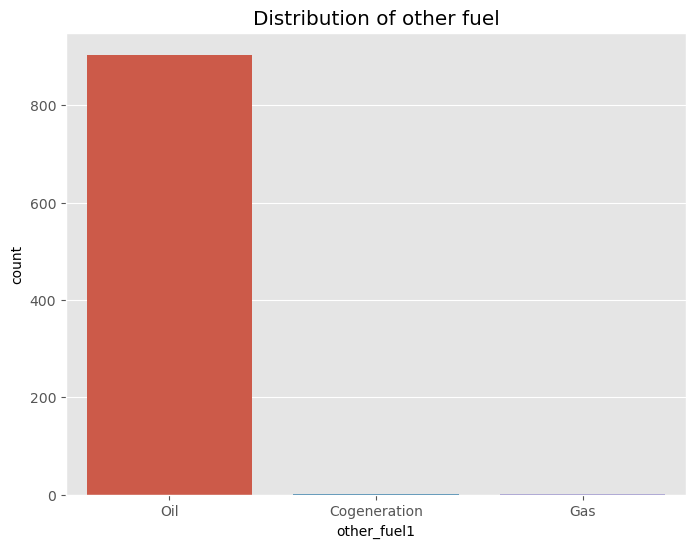

In [276]:
plt.figure(figsize=(8, 6))
sns.countplot(data=GPP, x='other_fuel1')
plt.title('Distribution of other fuel')
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


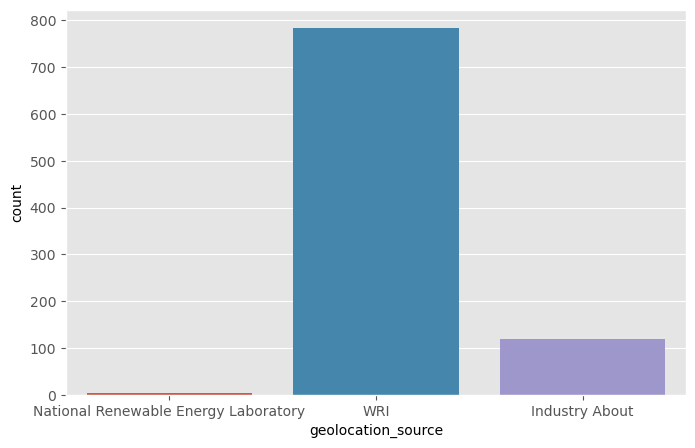

In [277]:
# Visualizing the counts of owner
print(GPP["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(GPP, x='geolocation_source')
plt.show()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


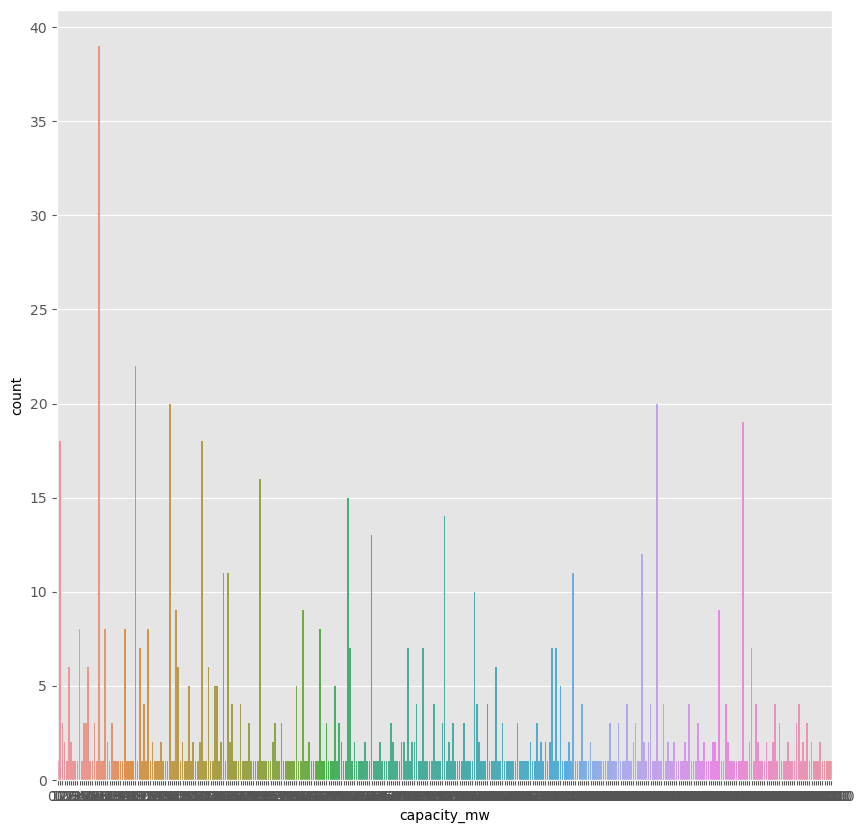

In [278]:
print(GPP['capacity_mw'].value_counts())   #visualizing the capacity_mw
plt.figure(figsize=(10,10))
sns.countplot(GPP, x='capacity_mw')
plt.show()

# Checking the Distribution of the Dataset, if it is normal

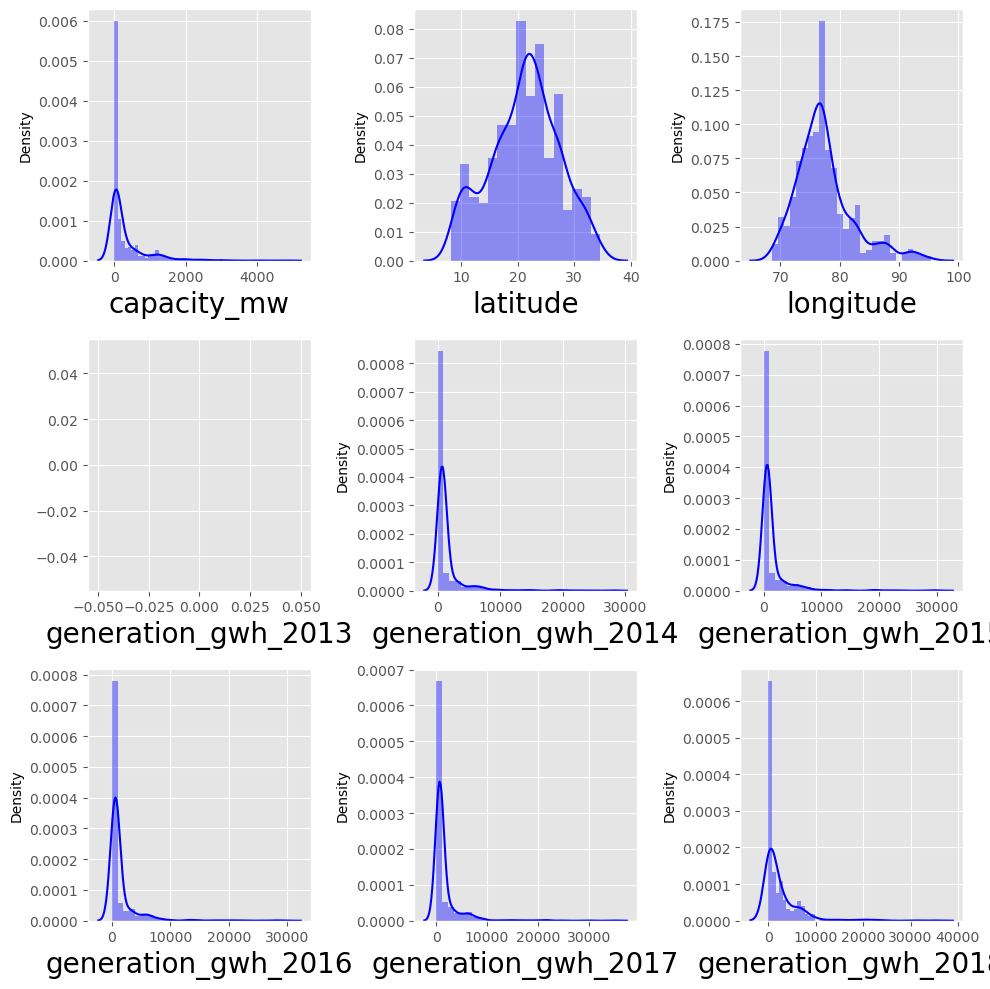

In [279]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(GPP[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

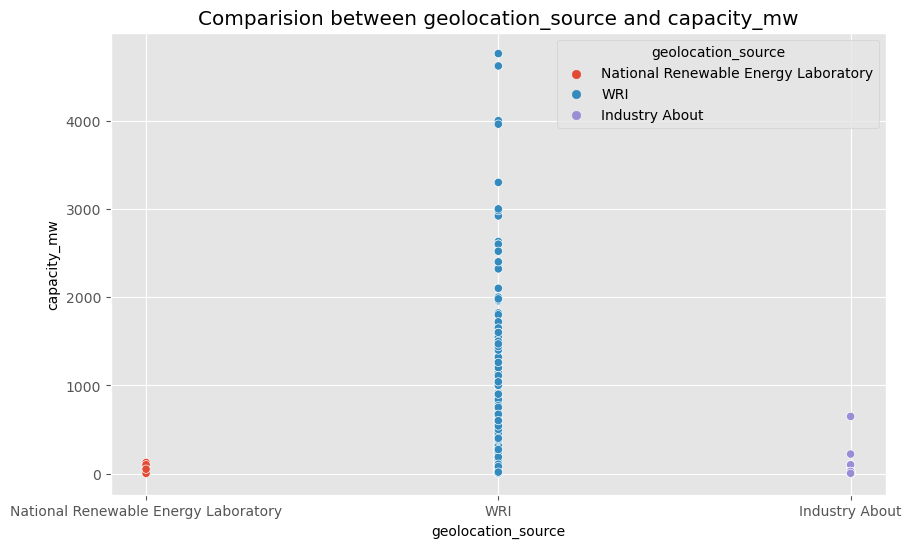

In [280]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(data=GPP, x='geolocation_source', y='capacity_mw', hue='geolocation_source')
plt.show()

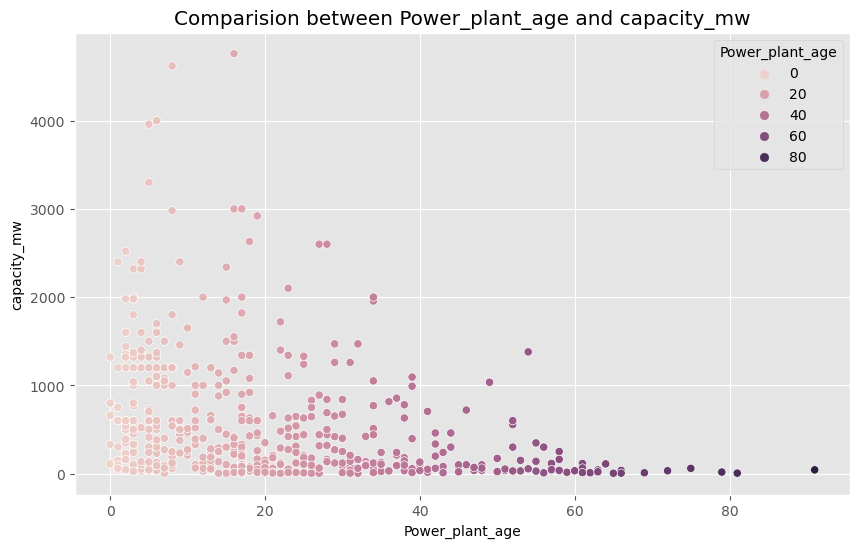

In [281]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(data=GPP, x='Power_plant_age', y='capacity_mw', hue='Power_plant_age')
plt.show()

<Axes: title={'center': 'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

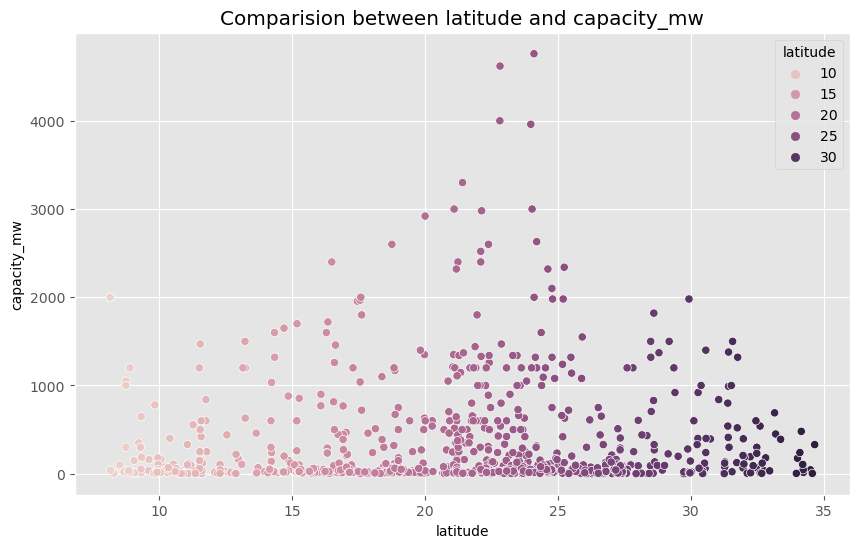

In [282]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(data=GPP, x='latitude', y='capacity_mw', hue='latitude')

<Axes: title={'center': 'Comparision between longitude and capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

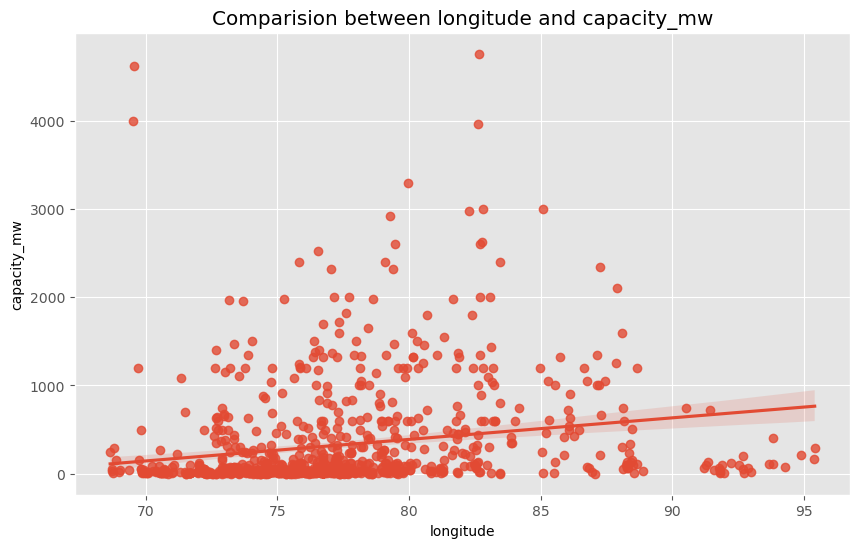

In [283]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(data=GPP, x='longitude', y='capacity_mw')

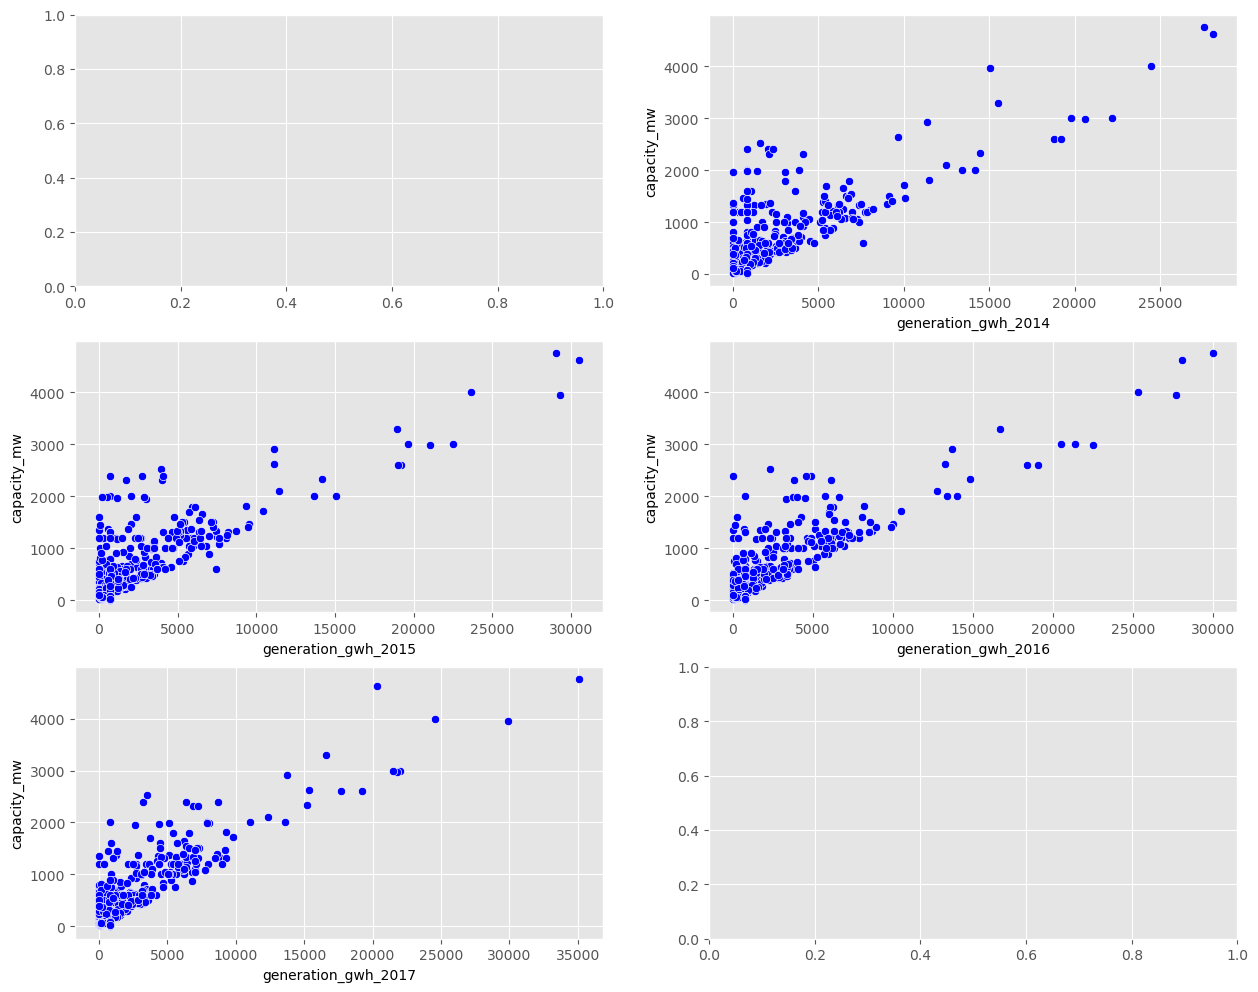

In [284]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2013", y = "capacity_mw",ax=axes[0,0],data = GPP,color="b")

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,1],data=GPP,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[1,0],data=GPP,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,1],data=GPP,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[2,0],data=GPP,color="b")
plt.show()

<Axes: title={'center': 'Comparision between Power_plant_age and Fuel_Type'}, xlabel='Power_plant_age', ylabel='Fuel_Type'>

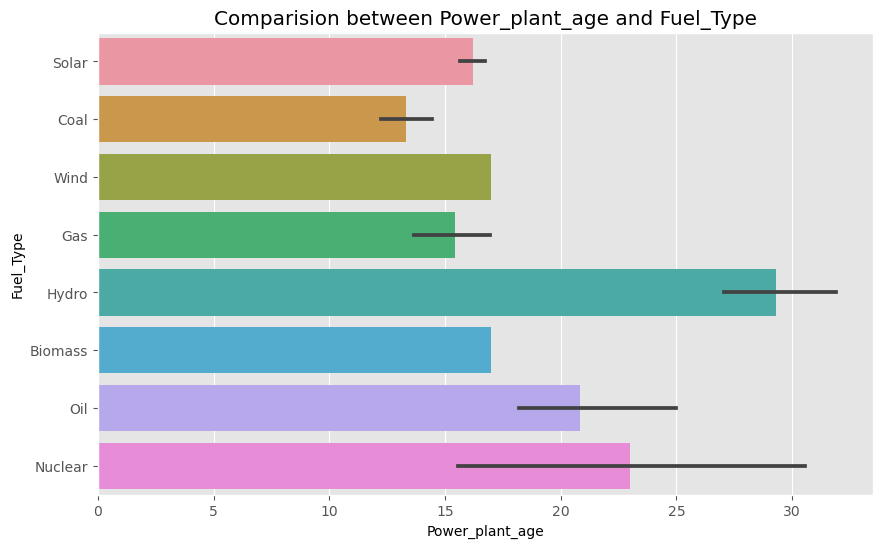

In [285]:
#Checking the relation between target fuel_type and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(data=GPP, x='Power_plant_age', y='Fuel_Type')    

<Axes: title={'center': 'Comparision between latitude and Fuel_Type'}, xlabel='latitude', ylabel='Fuel_Type'>

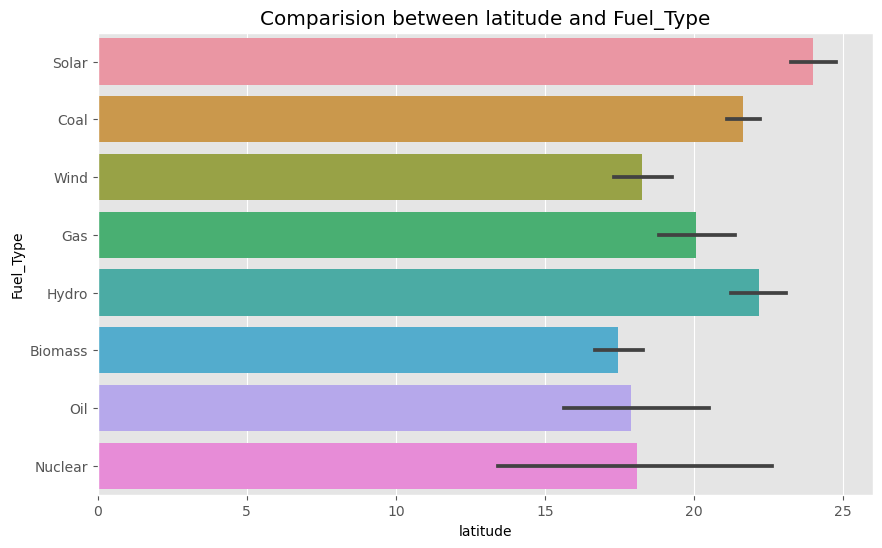

In [286]:
# Checking the relation between feature latitude and targer Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(data=GPP, x='latitude',y="Fuel_Type")

<Axes: title={'center': 'Comparision between longitude and Fuel_Type'}, xlabel='longitude', ylabel='Fuel_Type'>

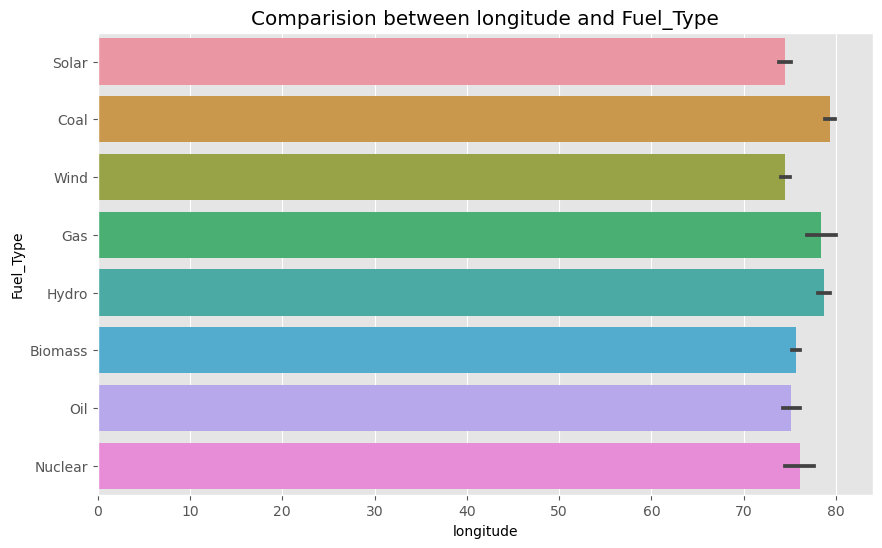

In [287]:
# Checking the relationship between target longitude and Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and Fuel_Type')
sns.barplot(data=GPP, x='longitude',y="Fuel_Type")

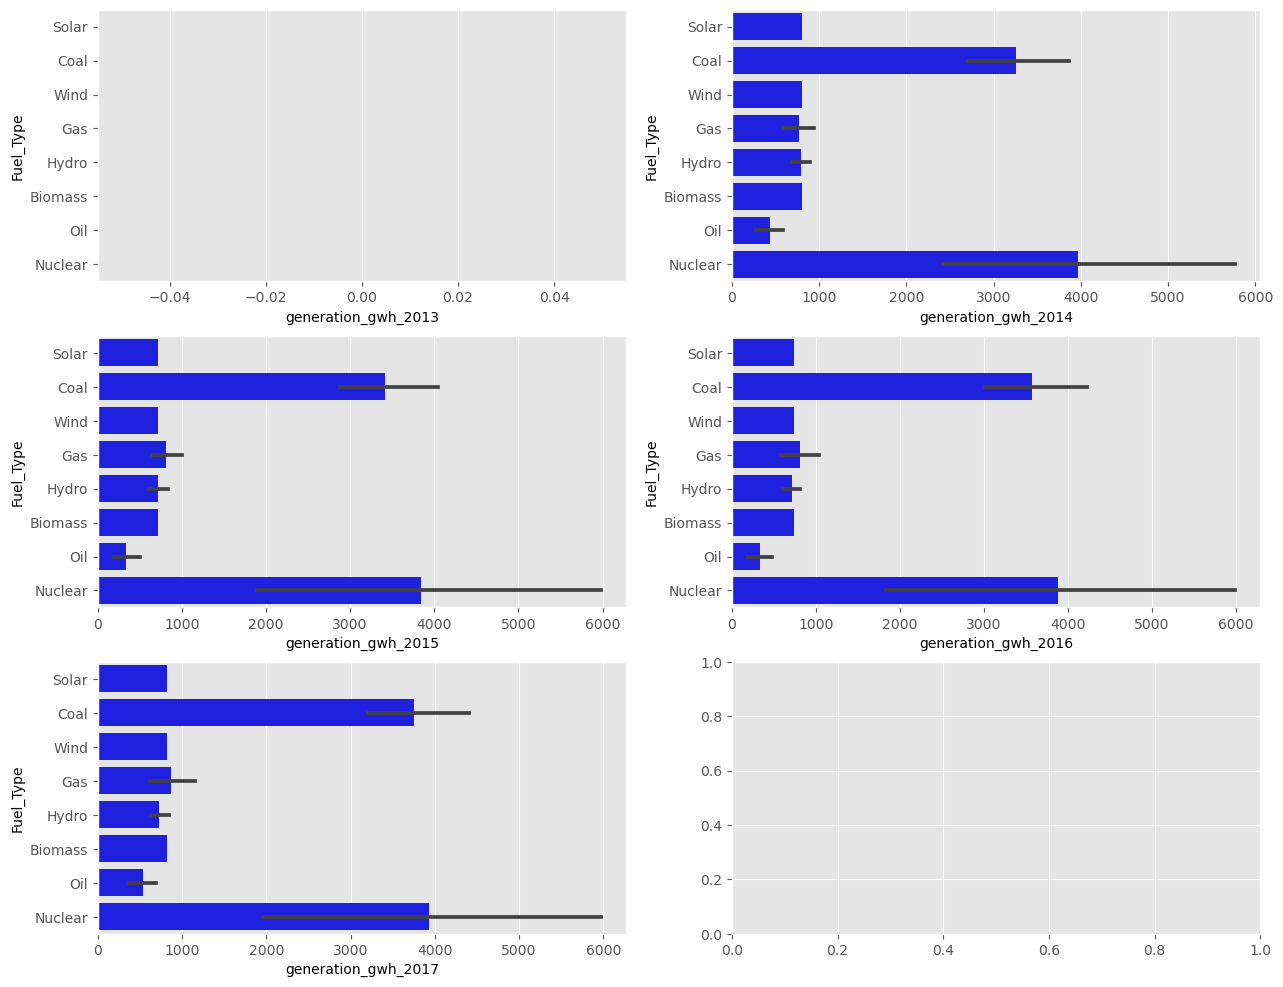

In [288]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer Fuel_Type
sns.barplot(x = "generation_gwh_2013", y = "Fuel_Type",ax=axes[0,0],data = GPP,color="b")

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2014',y='Fuel_Type',ax=axes[0,1],data=GPP,color="b")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[1,0],data=GPP,color="b")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,1],data=GPP,color="b")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[2,0],data=GPP,color="b")
plt.show()

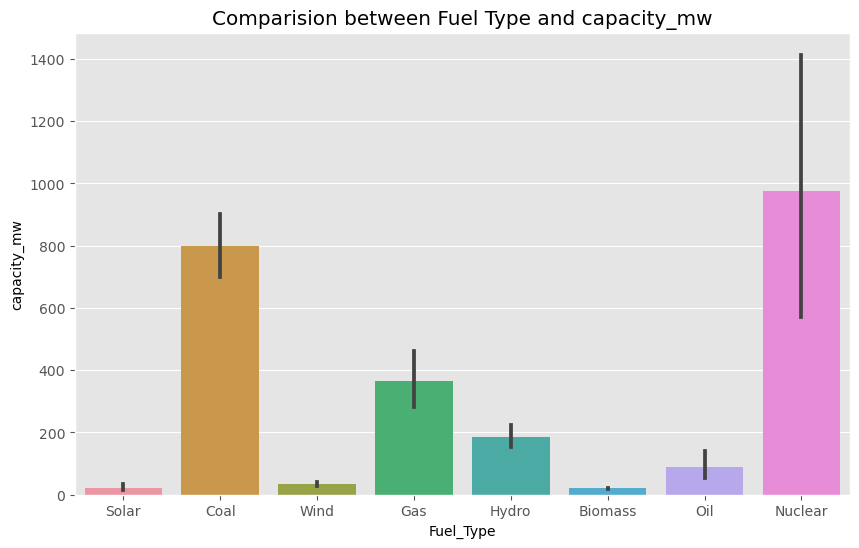

In [289]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = GPP)
plt.show()

Label Encoding

In [290]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']
LE=LabelEncoder()
GPP[categorical_col]= GPP[categorical_col].apply(LE.fit_transform)
GPP[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


# Identifying the outliers

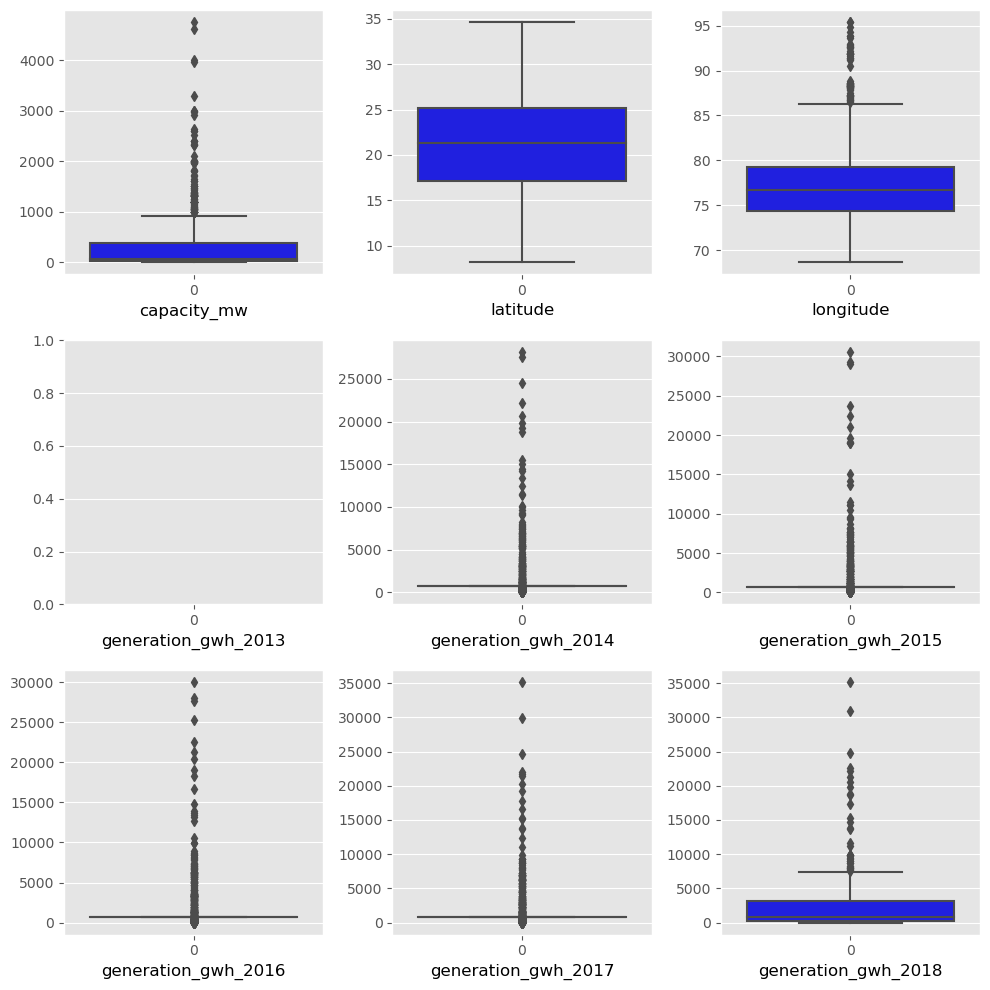

In [291]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(GPP[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [292]:
GPP.drop('generation_gwh_2013', axis=1, inplace=True)
GPP.drop('generation_gwh_2019', axis=1, inplace=True)

In [293]:
mean_value = GPP['generation_gwh_2018'].mean()
GPP['generation_gwh_2018'].fillna(value=mean_value, inplace=True)

In [294]:
GPP.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [295]:
# Features containing outliers
features = GPP[['capacity_mw','longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','Power_plant_age']]
z=np.abs(zscore(features))
z

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,0.548908,0.869917,0.257022,0.267783,0.275737,0.275565,0.933076
1,0.386977,0.585590,0.257022,0.267783,0.275737,0.275565,0.172699
2,0.486679,1.673567,0.257022,0.267783,0.275737,0.275565,0.172699
3,0.324240,2.895239,0.322873,0.223348,0.226194,0.326203,0.400812
4,2.498942,1.035238,0.545554,1.476964,1.557432,1.224379,1.237227
...,...,...,...,...,...,...,...
902,2.159821,0.014609,0.257022,0.505833,0.443415,0.259992,1.313265
903,0.548060,0.153415,0.257022,0.267783,0.275737,0.275565,0.172699
904,0.509909,0.383592,0.257022,0.267783,0.275737,0.275565,0.172699
905,0.417498,0.764564,0.257022,0.267783,0.275737,0.275565,0.172699


In [296]:
# Creating new dataframe
new_GPP = GPP[(z < 3).all(axis=1)]
new_GPP

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,2600.804099,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,2600.804099,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,2600.804099,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,2600.804099,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,2600.804099,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,2600.804099,17.0


In [297]:
new_GPP.shape

(846, 13)

Correlation between the target variable and features using HEAT map

In [298]:
cor = new_GPP.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.053430,0.267535,-0.399258,-0.003577,-0.281067,0.239771,0.649177,0.698624,0.771628,0.788933,0.506261,-0.221471
latitude,0.053430,1.000000,-0.014702,-0.002374,0.037059,0.069624,-0.203636,0.080164,0.069602,0.054649,0.070945,0.022056,-0.097493
longitude,0.267535,-0.014702,1.000000,-0.382790,0.029129,-0.235295,0.263498,0.118292,0.151985,0.192754,0.194455,-0.023244,-0.078514
Fuel_Type,-0.399258,-0.002374,-0.382790,1.000000,0.006806,0.035757,-0.477833,-0.247812,-0.271721,-0.282330,-0.281962,-0.036288,0.067425
other_fuel1,-0.003577,0.037059,0.029129,0.006806,1.000000,0.028661,-0.022973,-0.000743,0.005719,0.015175,0.011257,0.056544,-0.057973
source,-0.281067,0.069624,-0.235295,0.035757,0.028661,1.000000,-0.497294,-0.140080,-0.153732,-0.156141,-0.152218,0.102835,-0.079711
geolocation_source,0.239771,-0.203636,0.263498,-0.477833,-0.022973,-0.497294,1.000000,0.112280,0.123223,0.125154,0.122010,-0.082427,0.055035
generation_gwh_2014,0.649177,0.080164,0.118292,-0.247812,-0.000743,-0.140080,0.112280,1.000000,0.913705,0.802119,0.754073,0.617937,-0.055515
generation_gwh_2015,0.698624,0.069602,0.151985,-0.271721,0.005719,-0.153732,0.123223,0.913705,1.000000,0.909054,0.835419,0.683588,-0.122384
generation_gwh_2016,0.771628,0.054649,0.192754,-0.282330,0.015175,-0.156141,0.125154,0.802119,0.909054,1.000000,0.936047,0.778636,-0.192343


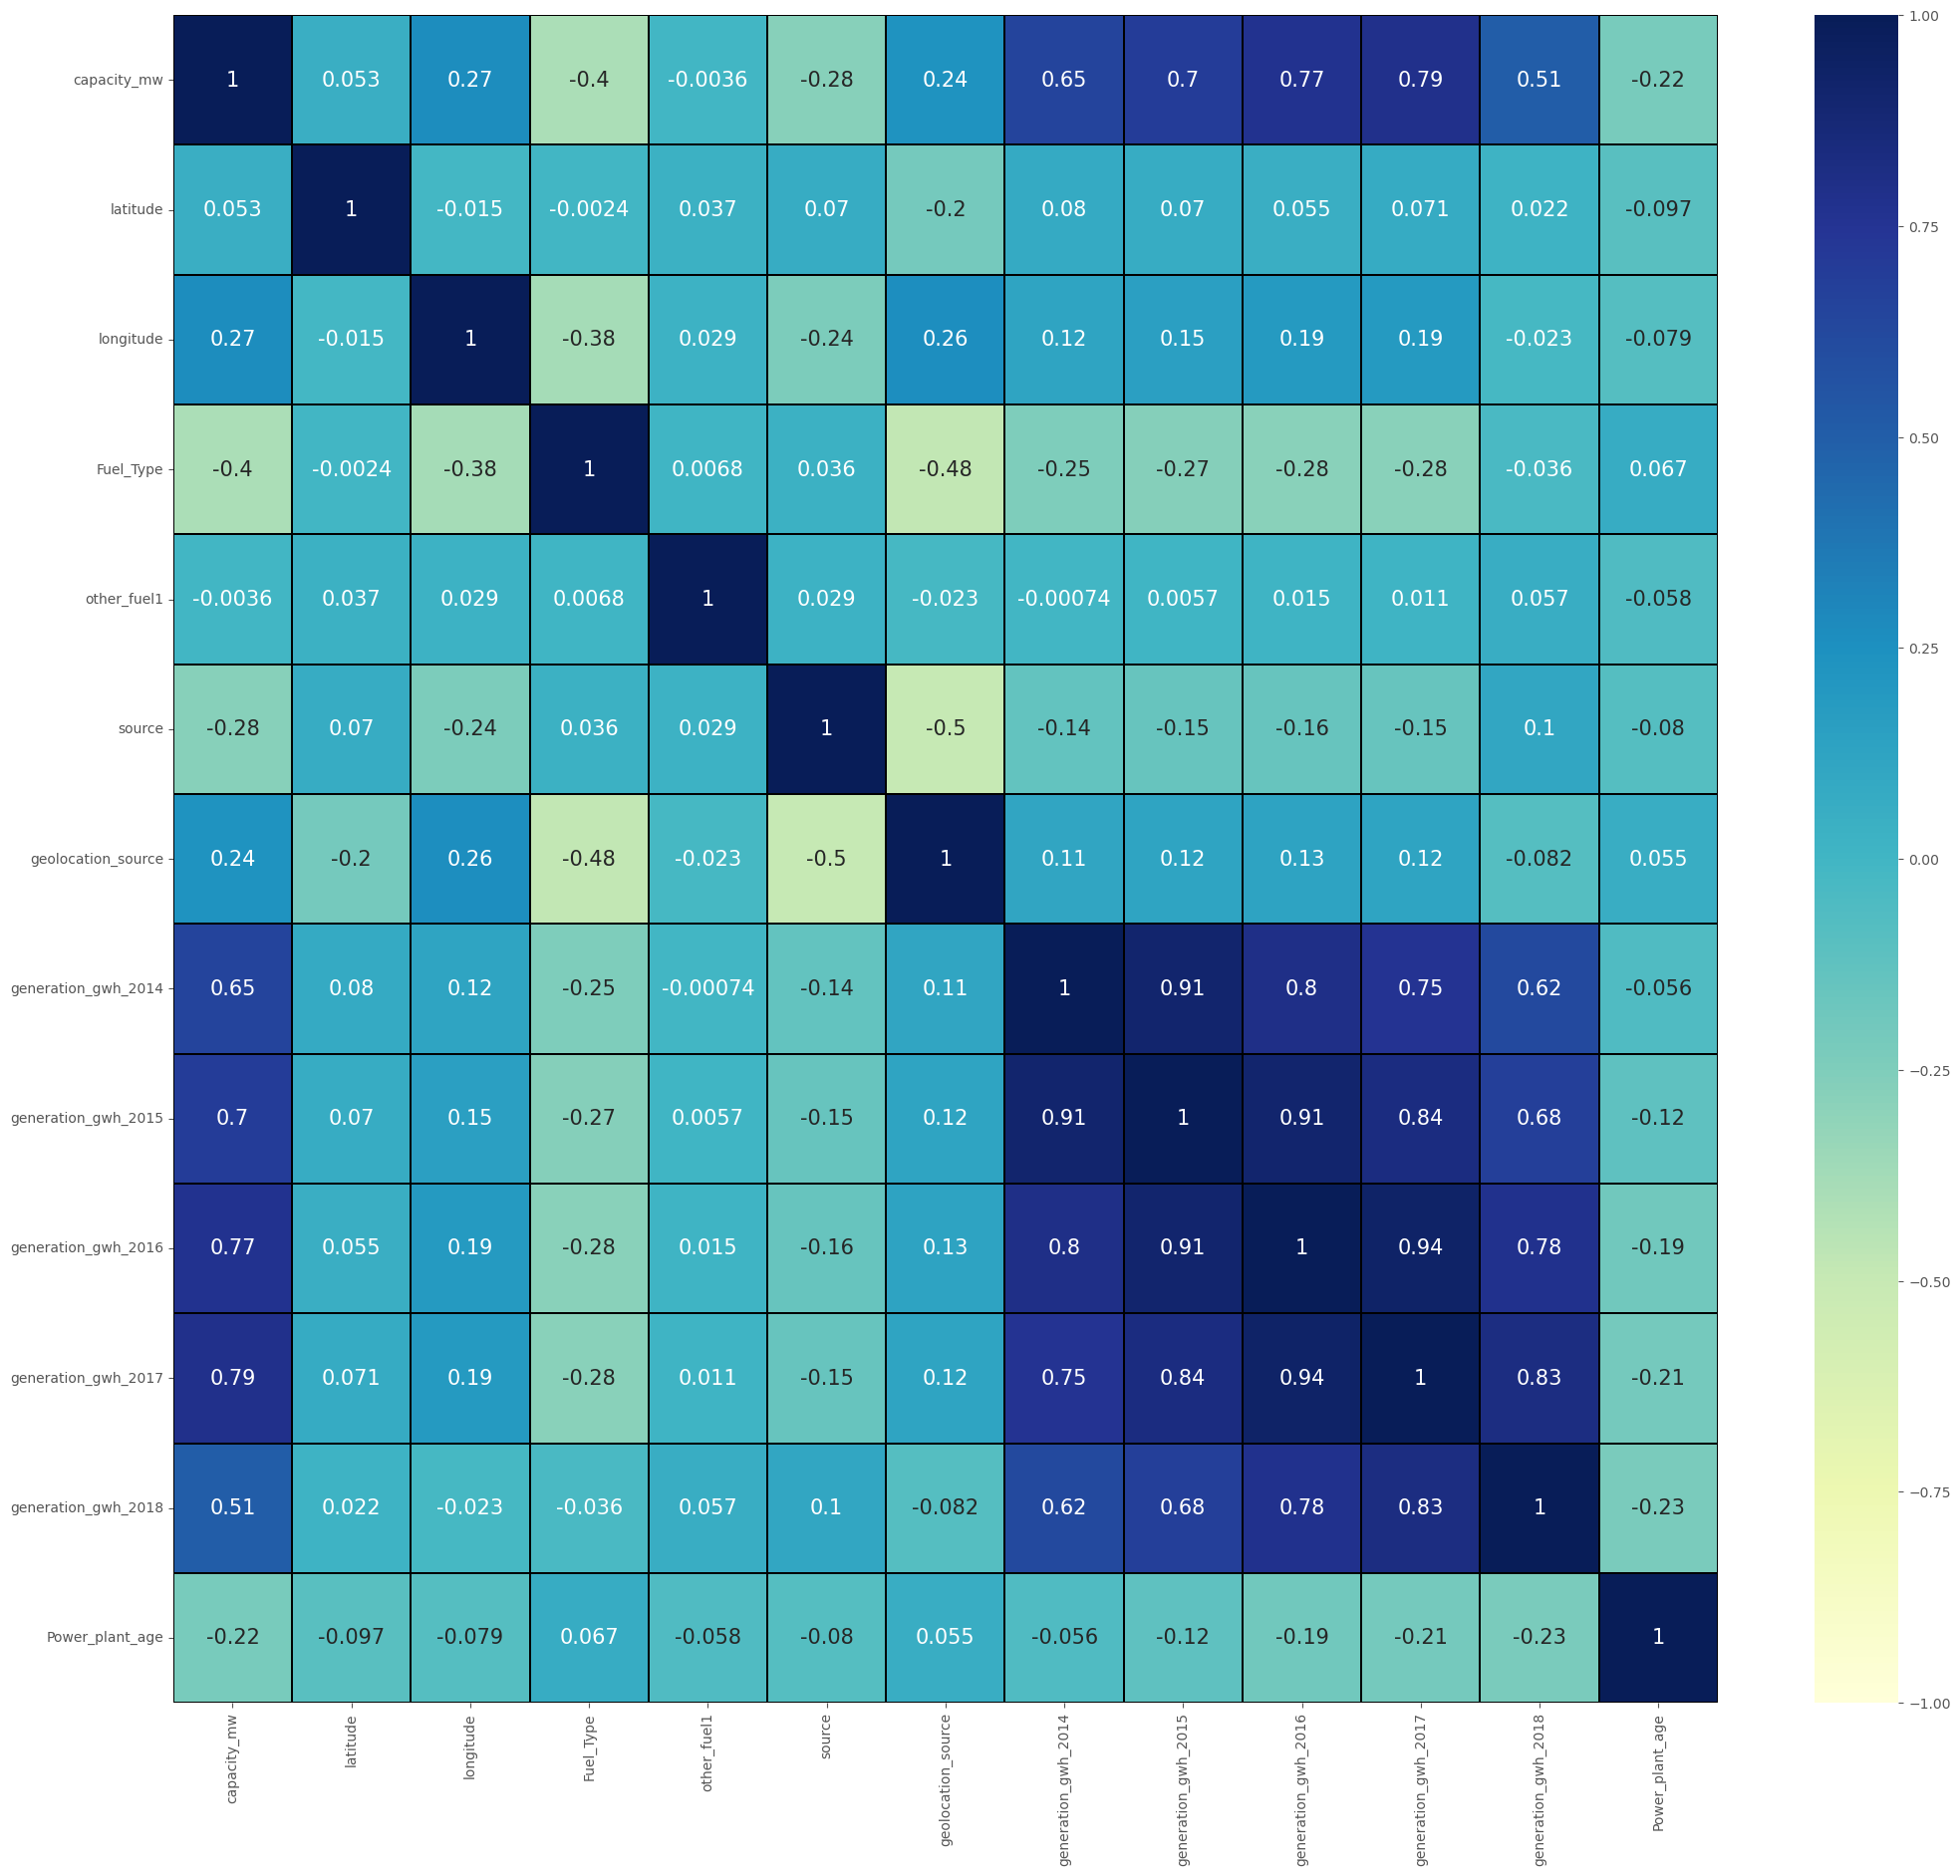

In [299]:
plt.figure(figsize=(25,22))
sns.heatmap(new_GPP.corr(), linewidths=.1, vmin=-1, vmax=1, fmt='.2g', annot=True, linecolor="black", annot_kws={'size':15}, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

Visualizing the correlation between label and features using bar plot

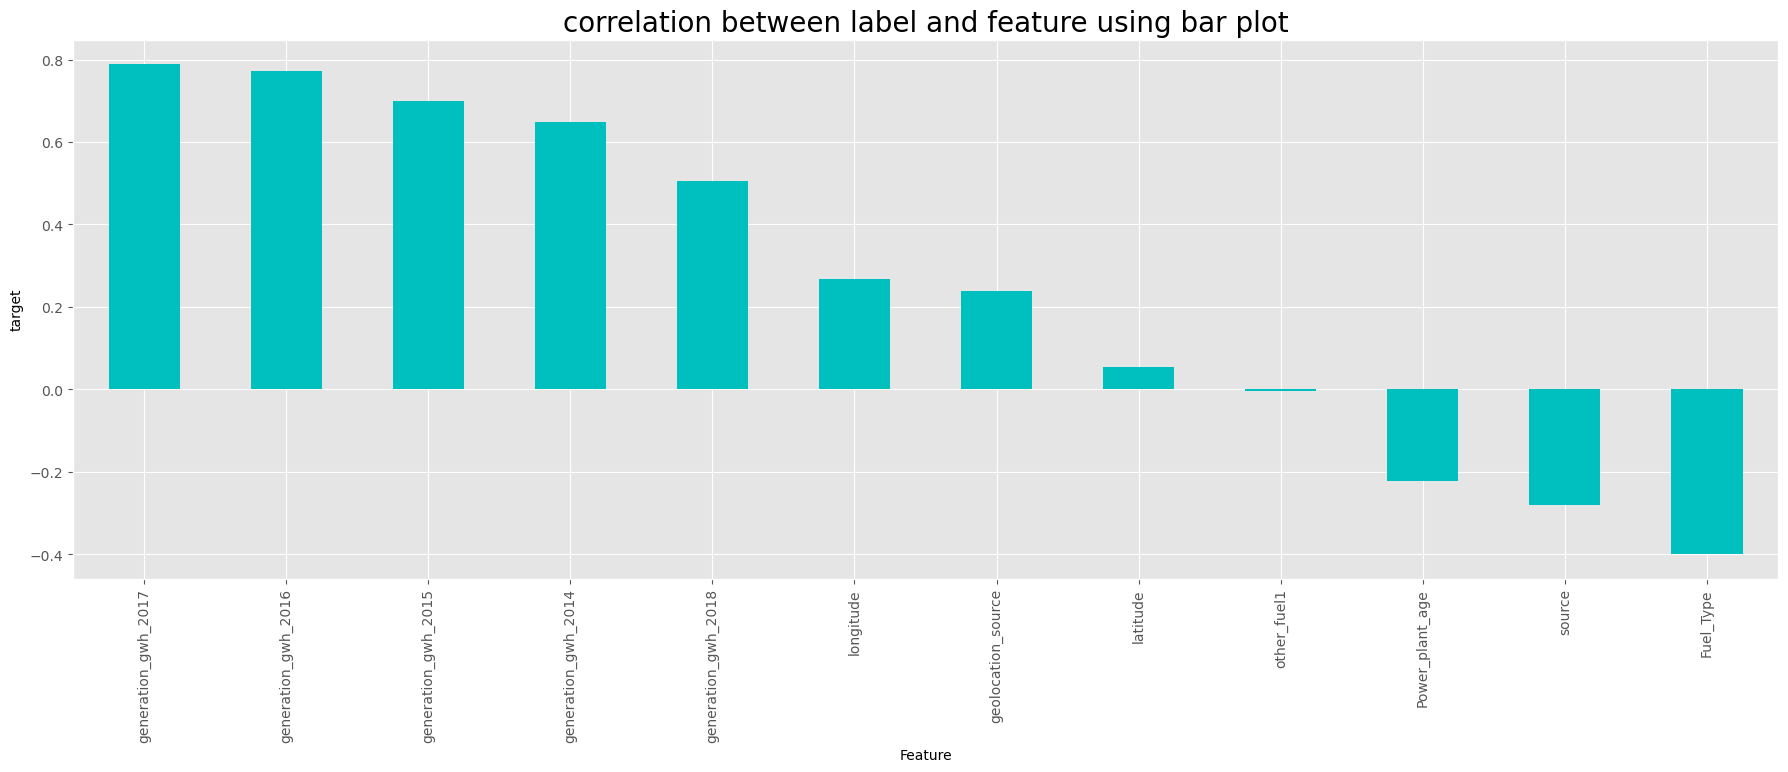

In [300]:
plt.figure(figsize=(22,7))
new_GPP.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

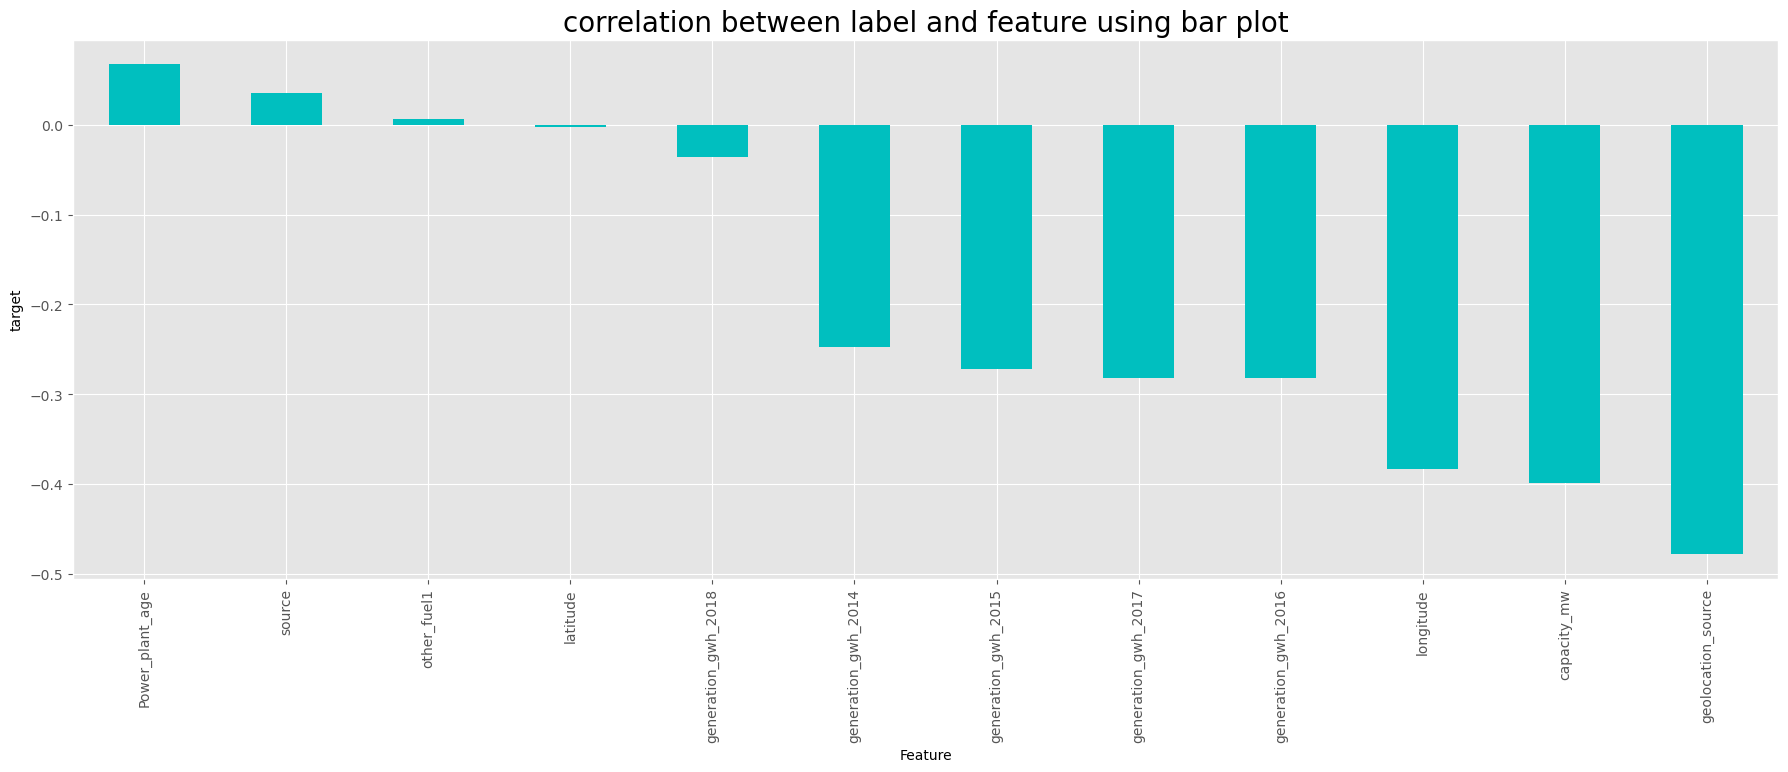

In [301]:
plt.figure(figsize=(22,7))
new_GPP.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [302]:
new_GPP.drop("other_fuel1",axis=1,inplace=True)
new_GPP.drop("latitude",axis=1,inplace=True)
new_GPP.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,2600.804099,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,2600.804099,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,2600.804099,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [303]:
x=new_GPP.drop('capacity_mw', axis=1)
y=new_GPP["capacity_mw"]

In [304]:
x.shape

(846, 10)

In [305]:
y.shape

(846,)

In [306]:
x.skew().sort_values()

geolocation_source    -2.056692
Fuel_Type              0.404222
longitude              0.948983
generation_gwh_2018    1.260362
Power_plant_age        1.288240
source                 1.724898
generation_gwh_2017    2.598081
generation_gwh_2016    2.699308
generation_gwh_2015    2.760332
generation_gwh_2014    2.961146
dtype: float64

In [307]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [308]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.918187,-0.038481,-0.041708,-0.041000,-0.025789,-1.097975
1,-0.496301,-0.038481,-0.041708,-0.041000,-0.025789,0.036682
2,-2.373965,-0.038481,-0.041708,-0.041000,-0.025789,0.036682
3,2.426620,-0.263441,0.101715,0.111906,-0.191976,-0.257097
4,1.262372,1.432304,2.302682,2.301691,2.020971,-1.779433


In [309]:
x.skew()

longitude              0.000318
Fuel_Type              0.404222
source                 1.724898
geolocation_source    -2.056692
generation_gwh_2014    0.234988
generation_gwh_2015    0.168580
generation_gwh_2016    0.154255
generation_gwh_2017    0.131308
generation_gwh_2018    1.260362
Power_plant_age        0.048496
dtype: float64

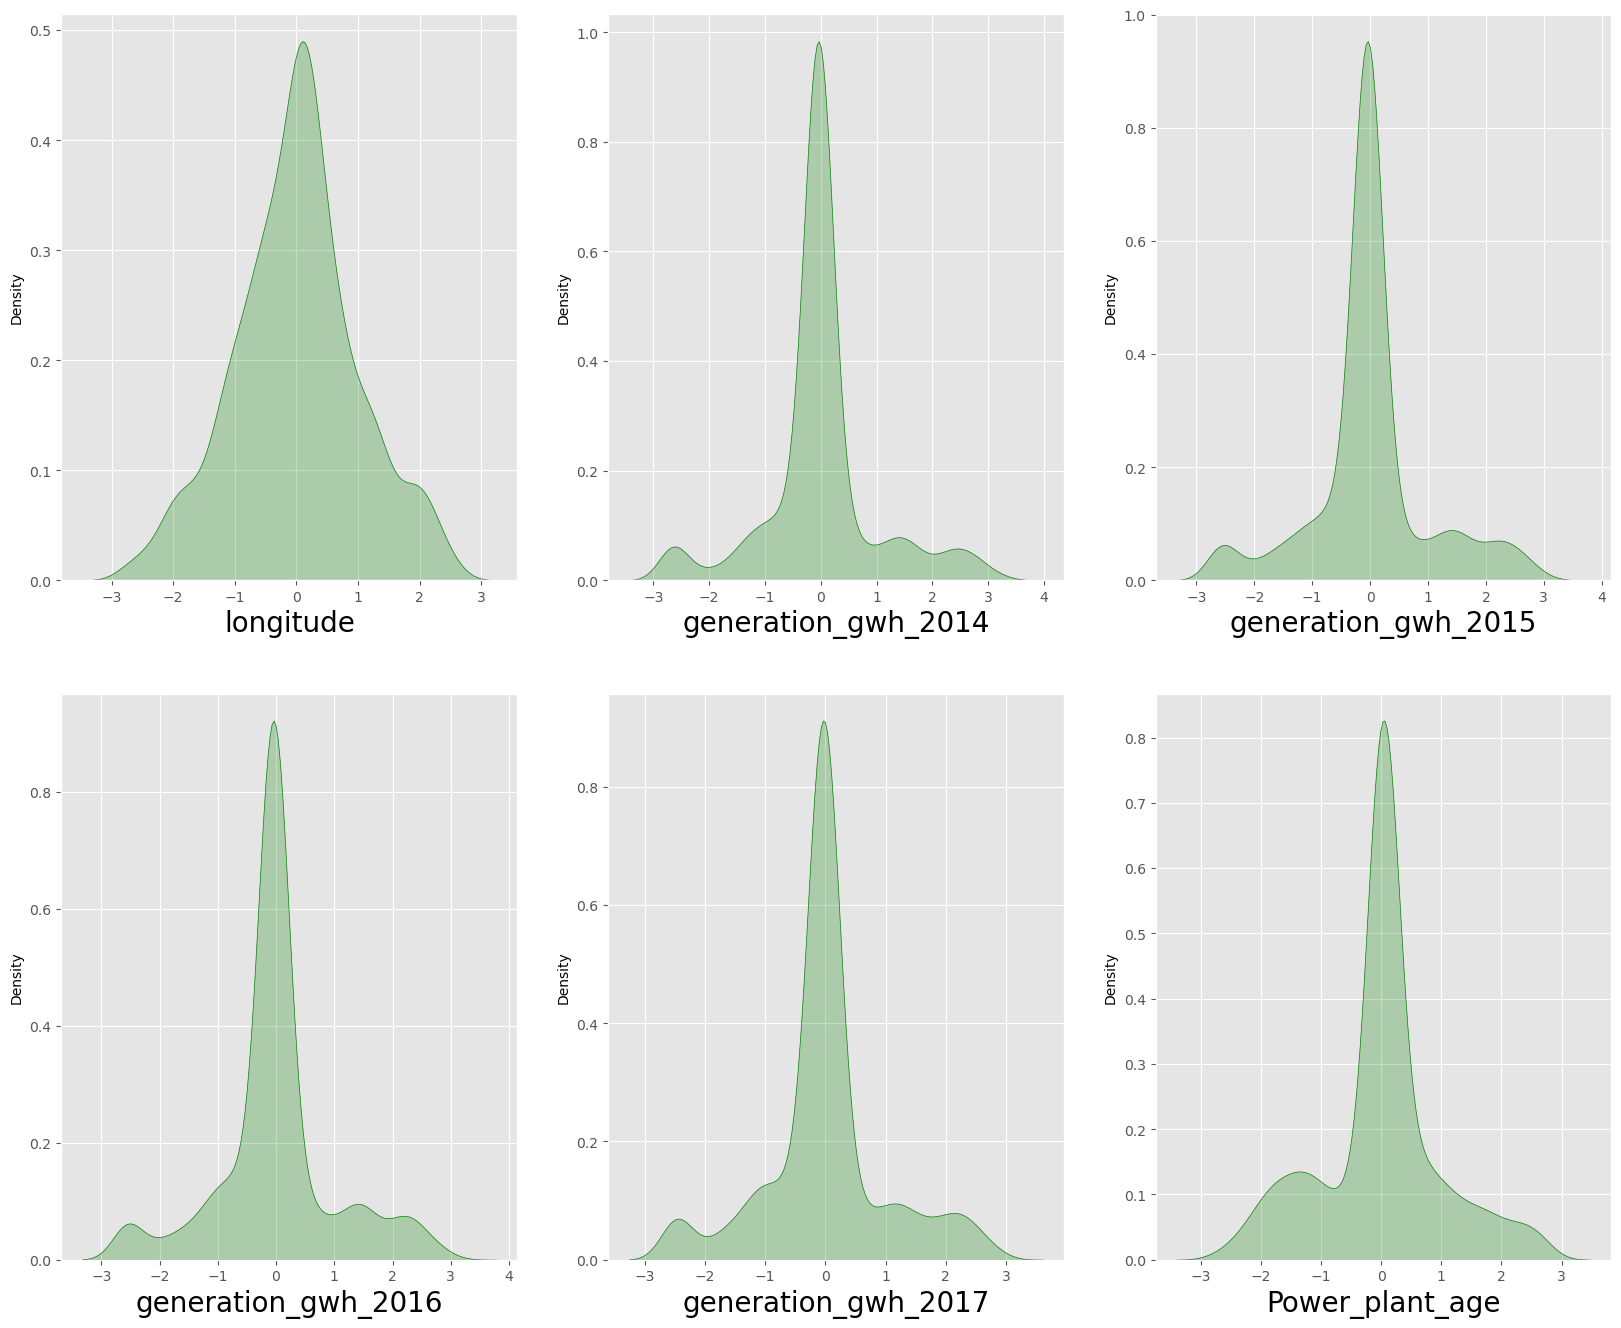

In [310]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [311]:
#Scaling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.918187,1.169593,1.391906,-1.031579,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,-1.097975
1,-0.496301,-0.981441,2.812646,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
2,-2.373965,1.599800,-0.531557,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
3,2.426620,-0.551234,-0.509699,0.408546,-0.263441,0.101715,0.111906,-0.191976,-0.996146,-0.257097
4,1.262373,-0.981441,-0.509699,0.408546,1.432304,2.302682,2.301691,2.020971,3.039862,-1.779433
...,...,...,...,...,...,...,...,...,...,...
841,0.234562,-0.981441,-0.509699,0.408546,-0.038481,-2.461769,-0.842413,0.020775,-0.959588,-2.003545
842,0.423902,1.169593,0.692465,-2.471705,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
843,-0.221150,1.599800,-0.531557,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
844,-0.756895,-0.981441,0.299030,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682


In [312]:
print(x.shape)

(846, 10)


# Checking Multi-colinearity

In [313]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.314046,longitude
1,1.711506,Fuel_Type
2,1.551220,source
3,1.875810,geolocation_source
4,3.575511,generation_gwh_2014
5,6.257296,generation_gwh_2015
6,10.382204,generation_gwh_2016
7,7.122985,generation_gwh_2017
8,3.830032,generation_gwh_2018
9,1.121045,Power_plant_age


# Modelling for Capacity_mw

In [314]:
#getting the best random state
maxAccu=0
maxRS=0
for i in range(1,100): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8535778733945959 Random_State 18


# Train Test Split

In [315]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)

# Linear Regression

In [316]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.6495969407126773
MAE: 182.16404958857666
MSE: 57783.90945586418
RMSE: 240.38283935394426


Accuracy score of 65% with the base line Linear Regression Model

# Randon Forest Regressor

In [317]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.8528413794571387
MAE: 88.74525608888756
MSE: 24267.483344447555
RMSE: 155.7802405456082


Accuracy score of 85% with the Random Forest Regression Model

# KNN Regressor

In [318]:
# Create and fit the KNN regressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(x_train, y_train)

# Predictions
pred_knn = knn_regressor.predict(x_test)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_knn))
print('MAE:', mean_absolute_error(y_test, pred_knn))
print('MSE:', mean_squared_error(y_test, pred_knn))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.8539914238963542
MAE: 80.70922519685038
MSE: 24077.832991847874
RMSE: 155.17033541192038


Accuracy score of 85% with the KNN Regression Model

# Gradient Boosting Regressor

In [319]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.8411886155838068
MAE: 93.1350443554815
MSE: 26189.105415717917
RMSE: 161.83048357994213


Accuracy score of 84% with the Gradient Boosting Regression Model

# Bagging Regressor

In [320]:
br=BaggingRegressor()
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predbr))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predbr))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.8306996597648213
MAE: 96.34128181531395
MSE: 27918.807418216227
RMSE: 167.08921993419034


Accuracy score of 80% with the Bagging Regression Model

# Cross Validation

In [321]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print(cross_val_score(rf,x,y,cv=5).mean())

#Checking the cv score for KNN Regressor
print(cross_val_score(knn_regressor,x,y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(gb,x,y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print(cross_val_score(br,x,y,cv=5).mean())

0.5465200421443284
0.7784845200393542
0.7571650889388797
0.7551988154170927
0.7541888706746168


From the above observation, the difference between R2 score and the cross validation score we conclude that Bagging Regressor as our best fitting model. Let's increse the accuracy of the model by usiing hyper parameter tuning.

# Hyper Parameter Tuning for the model with best acc and cv score

In [322]:
# BaggingRegressor
parameters = {
    'base_estimator': [None],  # You can specify a base estimator here if needed
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [1.0, 0.8, 0.6],
    'max_features': [1.0, 0.8, 0.6],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bagging_regressor = BaggingRegressor()

In [323]:
GCV = GridSearchCV(bagging_regressor, parameters, cv=5)

In [324]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'base_estimator': [None], 'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [1.0, 0.8, 0.6],
                         'max_samples': [1.0, 0.8, 0.6],
                         'n_estimators': [10, 50, 100, 200]})

In [325]:
GCV.best_params_

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 0.6,
 'n_estimators': 200}

In [331]:
# Best parameters from GridSearchCV
best_params = {
    'bootstrap': True,
    'bootstrap_features': True,
    'max_features': 1.0,
    'max_samples': 0.6,
    'n_estimators': 200
}

# Create the base estimator (RandomForestRegressor in this case) with valid 'criterion'
base_estimator = RandomForestRegressor(criterion='squared_error', max_depth=6, max_features='log2', n_estimators=200)

# Create the Bagging Regressor with the best parameters
bagging_regressor = BaggingRegressor(base_estimator, **best_params)

# Fit the Bagging Regressor
bagging_regressor.fit(x_train, y_train)

# Predictions
pred_bagging = bagging_regressor.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, pred_bagging) * 100
rmse = np.sqrt(mean_squared_error(y_test, pred_bagging))

print('R2_Score:', r2)
print("RMSE value:", rmse)

R2_Score: 86.51263197717954
RMSE value: 149.13621614790887


After HyperParameter Tuning, the accuracy score of 86%

# Saving the model

In [332]:
import joblib
joblib.dump(capacity_mw,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

# Fuel_Type (Prediction)
Seperating the Dataset into Features and Label(Fuel_Type)

In [336]:
x_GPP = new_GPP.drop("Fuel_Type", axis=1)
y_GPP = new_GPP["Fuel_Type"]

In [337]:
x_GPP.shape

(846, 10)

In [338]:
y_GPP.shape

(846,)

In [339]:
x_GPP.skew().sort_values()

geolocation_source    -2.056692
longitude              0.948983
generation_gwh_2018    1.260362
Power_plant_age        1.288240
source                 1.724898
capacity_mw            1.992633
generation_gwh_2017    2.598081
generation_gwh_2016    2.699308
generation_gwh_2015    2.760332
generation_gwh_2014    2.961146
dtype: float64

In [343]:
# Removing the skewness
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [344]:
x_GPP[skew] = scaler.fit_transform(x_GPP[skew].values)
x_GPP[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.676116,-0.918187,-0.038481,-0.041708,-0.041000,-0.025789,-1.097975
1,0.231634,-0.496301,-0.038481,-0.041708,-0.041000,-0.025789,0.036682
2,-0.266730,-2.373965,-0.038481,-0.041708,-0.041000,-0.025789,0.036682
3,0.404484,2.426620,-0.263441,0.101715,0.111906,-0.191976,-0.257097
4,1.759489,1.262372,1.432304,2.302682,2.301691,2.020971,-1.779433


In [345]:
x_GPP.skew().sort_values()

geolocation_source    -2.056692
longitude              0.000318
capacity_mw            0.015186
Power_plant_age        0.048496
generation_gwh_2017    0.131308
generation_gwh_2016    0.154255
generation_gwh_2015    0.168580
generation_gwh_2014    0.234988
generation_gwh_2018    1.260362
source                 1.724898
dtype: float64

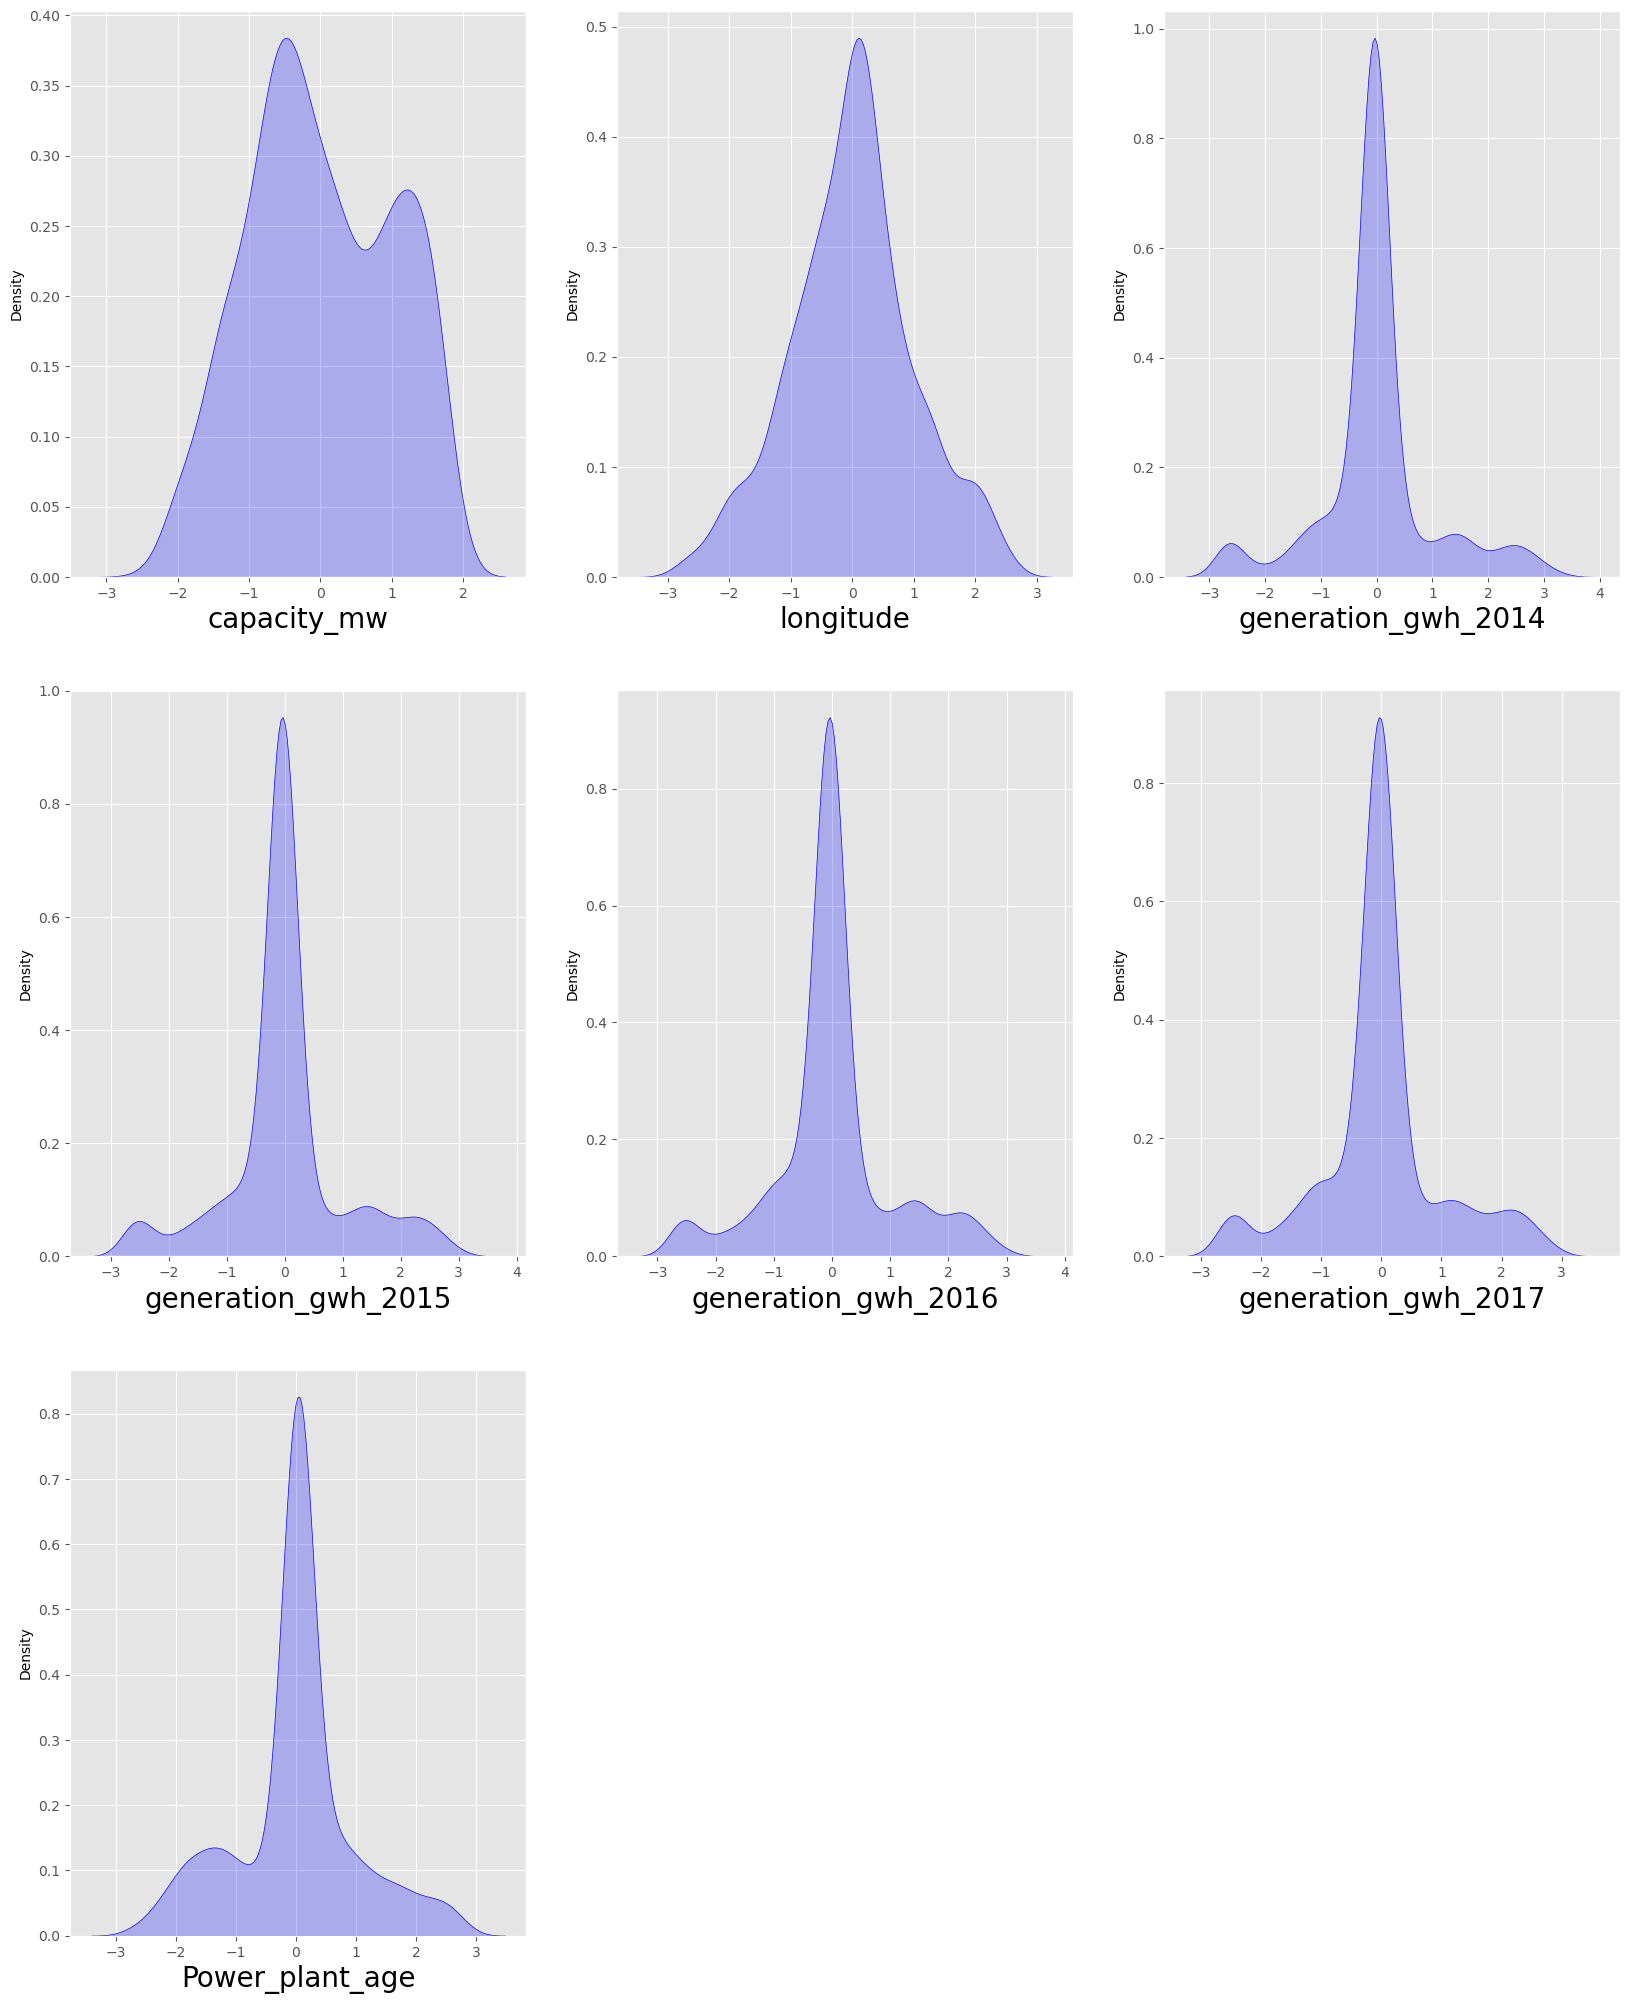

In [347]:
# visualize the data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_GPP[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_GPP[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Feature Scaling

In [348]:
scaler=StandardScaler()
x_GPP=pd.DataFrame(scaler.fit_transform(x_GPP),columns=x_GPP.columns)
x_GPP

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.676116,-0.918187,1.391906,-1.031579,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,-1.097975
1,0.231634,-0.496301,2.812646,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
2,-0.266730,-2.373965,-0.531557,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
3,0.404484,2.426620,-0.509699,0.408546,-0.263441,0.101715,0.111906,-0.191976,-0.996146,-0.257097
4,1.759489,1.262373,-0.509699,0.408546,1.432304,2.302682,2.301691,2.020971,3.039862,-1.779433
...,...,...,...,...,...,...,...,...,...,...
841,1.699689,0.234562,-0.509699,0.408546,-0.038481,-2.461769,-0.842413,0.020775,-0.959588,-2.003545
842,-1.596709,0.423902,0.692465,-2.471705,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
843,-0.501102,-0.221150,-0.531557,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
844,0.121668,-0.756895,0.299030,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682


In [350]:
# Checking Multicolinearity
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_GPP.values,i)
              for i in range(len(x_GPP.columns))]
vif["Features"] = x_GPP.columns

# Let's check the values
vif

,VIF values,Features
0,1.909206,capacity_mw
1,1.198591,longitude
2,1.420752,source
3,1.592217,geolocation_source
4,3.596155,generation_gwh_2014
5,6.264555,generation_gwh_2015
6,10.384764,generation_gwh_2016
7,7.360460,generation_gwh_2017
8,4.013991,generation_gwh_2018
9,1.184171,Power_plant_age


In [351]:
y_GPP.value_counts()

1    233
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

# Oversampling

In [352]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_GPP, y_GPP = sm.fit_resample(x_GPP,y_GPP)
y_GPP.value_counts()

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: Fuel_Type, dtype: int64

In [353]:
x_GPP.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.676116,-0.918187,1.391906,-1.031579,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,-1.097975
1,0.231634,-0.496301,2.812646,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
2,-0.266730,-2.373965,-0.531557,0.408546,-0.038481,-0.041708,-0.041000,-0.025789,0.201757,0.036682
3,0.404484,2.426620,-0.509699,0.408546,-0.263441,0.101715,0.111906,-0.191976,-0.996146,-0.257097
4,1.759489,1.262373,-0.509699,0.408546,1.432304,2.302682,2.301691,2.020971,3.039862,-1.779433


# Modelling

Getting the best random state

In [356]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_GPP_train,x_GPP_test, y_GPP_train, y_GPP_test=train_test_split(x_GPP,y_GPP,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_GPP_train,y_GPP_train)
    pred=rfc.predict(x_GPP_test)
    acc=accuracy_score(y_GPP_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.9392857142857143  on Random_state  140


# Creating train_test_split

In [358]:
x_GPP_train,x_GPP_test,y_GPP_train,y_GPP_test=train_test_split(x_GPP,y_GPP,test_size=.30,random_state=maxRS)

# Logistic Regression

In [359]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_GPP_train,y_GPP_train)

#Prediction
predlog = log.predict(x_GPP_test)

print(accuracy_score(y_GPP_test, predlog))
print(confusion_matrix(y_GPP_test, predlog))
print(classification_report(y_GPP_test,predlog))

0.7428571428571429
[[65  0  0  0  0  0  0  4]
 [ 6 35  8  4 10  2  0  2]
 [ 3  3 34  8  4  7  0  1]
 [ 0  4 11 30  7  6  0 13]
 [ 0  0  2  5 69  0  0  0]
 [14  3  5  0  0 44  0  6]
 [ 0  1  0  0  0  0 73  0]
 [ 0  5  0  0  0  0  0 66]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        69
           1       0.69      0.52      0.59        67
           2       0.57      0.57      0.57        60
           3       0.64      0.42      0.51        71
           4       0.77      0.91      0.83        76
           5       0.75      0.61      0.67        72
           6       1.00      0.99      0.99        74
           7       0.72      0.93      0.81        71

    accuracy                           0.74       560
   macro avg       0.73      0.74      0.73       560
weighted avg       0.74      0.74      0.73       560



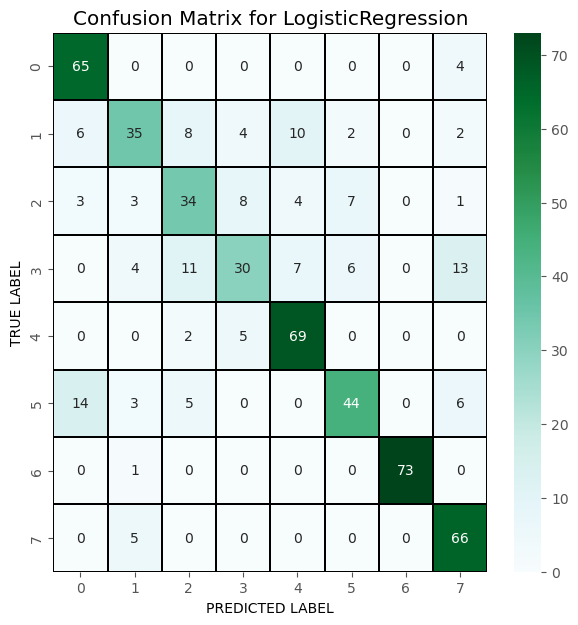

In [360]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_GPP_test,predlog)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

# Random Forest Classifier

In [361]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_GPP_train,y_GPP_train)

# Prediction
predrf = rf.predict(x_GPP_test)

print(accuracy_score(y_GPP_test, predrf))
print(confusion_matrix(y_GPP_test, predrf))
print(classification_report(y_GPP_test,predrf))

0.9357142857142857
[[68  0  0  1  0  0  0  0]
 [ 2 49  6  5  3  2  0  0]
 [ 1  2 54  2  0  1  0  0]
 [ 0  0  4 67  0  0  0  0]
 [ 0  0  0  1 75  0  0  0]
 [ 3  2  1  0  0 66  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 71]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        69
           1       0.92      0.73      0.82        67
           2       0.83      0.90      0.86        60
           3       0.88      0.94      0.91        71
           4       0.96      0.99      0.97        76
           5       0.96      0.92      0.94        72
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        71

    accuracy                           0.94       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.94      0.94      0.93       560



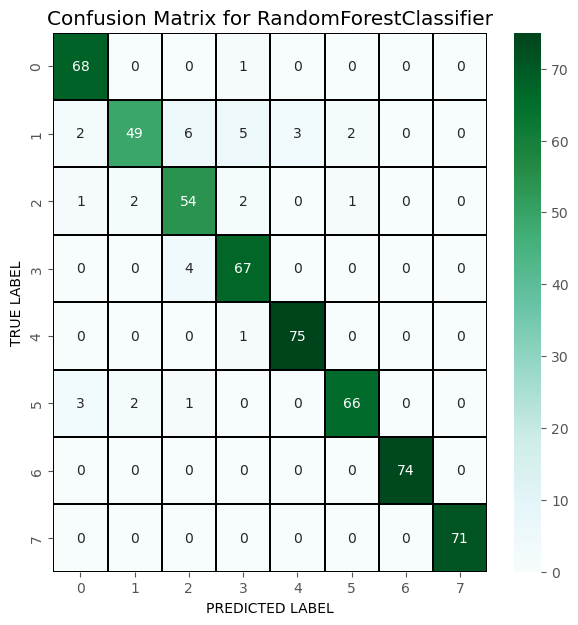

In [362]:
# plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_GPP_test,predrf)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Decision Tee Classifier

In [363]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_GPP_train,y_GPP_train)

#Prediction
preddtc = dtc.predict(x_GPP_test)

print(accuracy_score(y_GPP_test, preddtc))
print(confusion_matrix(y_GPP_test, preddtc))
print(classification_report(y_GPP_test,preddtc))

0.8821428571428571
[[65  3  0  1  0  0  0  0]
 [ 3 36 11  9  7  1  0  0]
 [ 0  2 52  3  0  3  0  0]
 [ 0  1  6 64  0  0  0  0]
 [ 0  4  1  5 66  0  0  0]
 [ 1  2  3  0  0 66  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 71]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        69
           1       0.75      0.54      0.63        67
           2       0.71      0.87      0.78        60
           3       0.78      0.90      0.84        71
           4       0.90      0.87      0.89        76
           5       0.94      0.92      0.93        72
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        71

    accuracy                           0.88       560
   macro avg       0.88      0.88      0.88       560
weighted avg       0.88      0.88      0.88       560



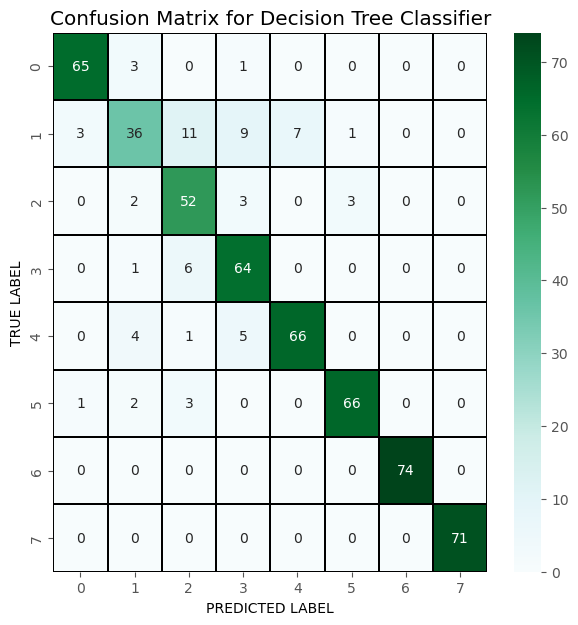

In [364]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_GPP_test,preddtc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Support Vector Machine Classifier

In [365]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_GPP_train,y_GPP_train)

# Prediction
predsvc = svc.predict(x_GPP_test)

print(accuracy_score(y_GPP_test, predsvc))
print(confusion_matrix(y_GPP_test, predsvc))
print(classification_report(y_GPP_test,predsvc))

0.8232142857142857
[[64  0  0  0  0  0  0  5]
 [ 5 34  9  3  9  3  0  4]
 [ 1  3 45  0  2  8  0  1]
 [ 0  4 12 40  5  3  0  7]
 [ 0  0  0  2 74  0  0  0]
 [ 7  0  1  0  0 59  0  5]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 71]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        69
           1       0.83      0.51      0.63        67
           2       0.67      0.75      0.71        60
           3       0.89      0.56      0.69        71
           4       0.82      0.97      0.89        76
           5       0.81      0.82      0.81        72
           6       1.00      1.00      1.00        74
           7       0.76      1.00      0.87        71

    accuracy                           0.82       560
   macro avg       0.83      0.82      0.81       560
weighted avg       0.83      0.82      0.81       560



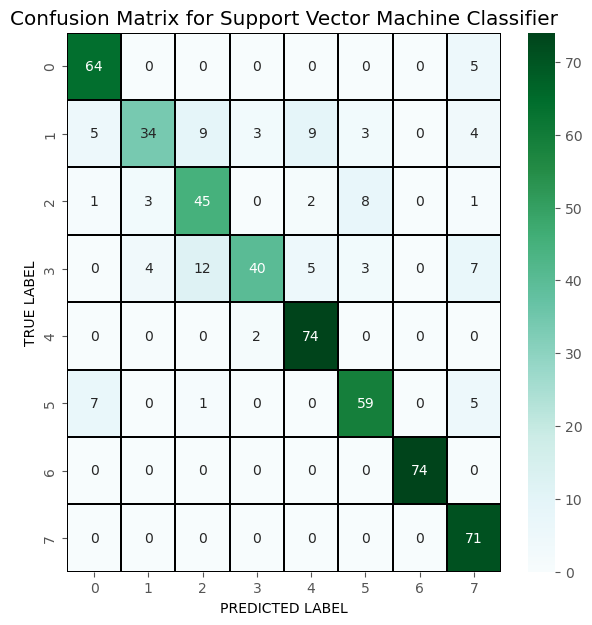

In [366]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_GPP_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Gradient Boosting Classifier

In [367]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_GPP_train,y_GPP_train)

# Prediction
predGB = GB.predict(x_GPP_test)

print(accuracy_score(y_GPP_test, predGB))
print(confusion_matrix(y_GPP_test, predGB))
print(classification_report(y_GPP_test,predGB))

0.9125
[[68  0  0  1  0  0  0  0]
 [ 3 50  5  3  5  1  0  0]
 [ 1  5 50  3  0  1  0  0]
 [ 0  2  6 61  2  0  0  0]
 [ 0  1  0  1 74  0  0  0]
 [ 3  5  1  0  0 63  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 71]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94        69
           1       0.79      0.75      0.77        67
           2       0.81      0.83      0.82        60
           3       0.88      0.86      0.87        71
           4       0.91      0.97      0.94        76
           5       0.97      0.88      0.92        72
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        71

    accuracy                           0.91       560
   macro avg       0.91      0.91      0.91       560
weighted avg       0.91      0.91      0.91       560



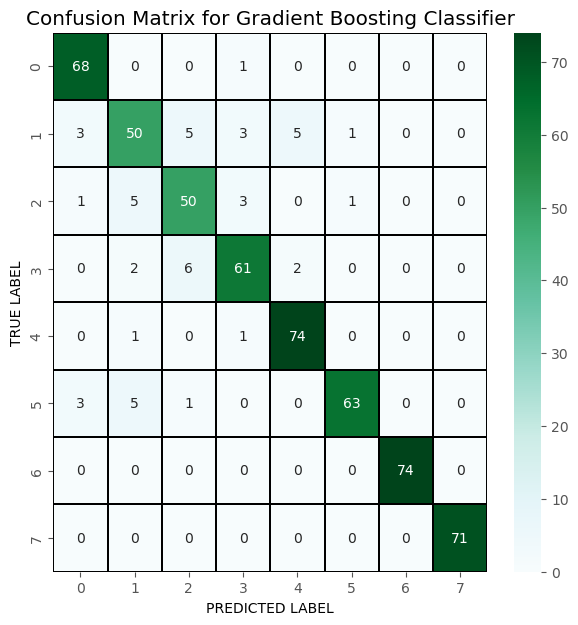

In [368]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_GPP_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Cross Validation Score

In [369]:
#cv score for Logistic Regression
print(cross_val_score(log,x_GPP,y_GPP,cv=5).mean())

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x_GPP,y_GPP,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(rf,x_GPP,y_GPP,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x_GPP,y_GPP,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_GPP,y_GPP,cv=5).mean())

0.7177981492692208
0.8707183833491886
0.9136239153622185
0.8047161924529389
0.8916270287410996


# HyperParameter Tuning for the model with best score

In [370]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_GPP_train,y_GPP_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [371]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [372]:
fuel_type =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fuel_type.fit(x_GPP_train, y_GPP_train)
pred = fuel_type.predict(x_GPP_test)
acc=accuracy_score(y_GPP_test,pred)
print(acc*100)

91.60714285714285


# Plotting ROC and compare AUC for the final model

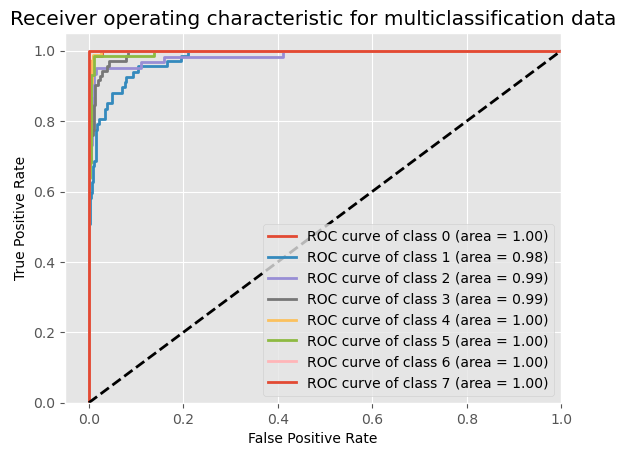

In [375]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_GPP_train, y_GPP_train).predict_proba(x_GPP_test)

#Binarize the output
y_GPP_test_bin  = label_binarize(y_GPP_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_GPP_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

# Saving the Model

In [376]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']